In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [10]:
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(plotly.__version__)

2.2.2
1.26.4
3.8.0
0.13.2
5.24.1


In [12]:
data = pd.read_csv("https://raw.githubusercontent.com/realaryagupta/Cardiovascular-Disease-Risk-Prediction/refs/heads/main/dataset/framingham.csv")

In [13]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [15]:
data.isna().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [18]:
shape = data.shape
print(f"There are {shape[0]} rows and {shape[1]} columns")

There are 4240 rows and 16 columns


# **Handling Missing Data**

Machine Learning models are not effective at handling missing values, so it is crucial to address them appropriately. When dealing with missing data, there are two main approaches:

1. **Removing Rows**: This involves removing rows with missing data, but it is generally a less preferred option since it may lead to the loss of valuable information.

2. **Imputation**: Filling in missing values with estimated ones. Imputation can be categorized into two types:
   - **Univariate**: Filling values in a single column at a time.
   - **Multivariate**: Filling values across multiple columns simultaneously.

---

## **Univariate and Multivariate Imputation**

### **Univariate Imputation**
Univariate imputation focuses on filling missing values in one column at a time. The technique depends on whether the missing data is numerical or categorical:

- **Numerical Data**:
  - Fill with mean or median.
  - Use random values.
  - Fill with an "end of distribution" value.

- **Categorical Data**:
  - Fill with mode.
  - Insert the word "MISSING."

For univariate imputation, the `SimpleImputer` class is commonly used.

---

### **Multivariate Imputation**
Multivariate imputation addresses missing values across multiple columns at once. Techniques include:
- **KNN Imputer Algorithm**
- **Iterative Imputer** (based on the MICE algorithm).

Both `KNN Imputer` and `Iterative Imputer` are implemented as classes.

---

## **1. Removing Missing Data: Complete Case Analysis (CCA)**

The method of removing rows with missing data is known as **Complete Case Analysis (CCA)** or **List-wise Deletion**. CCA involves analyzing only rows with complete data across all columns.

### **Assumptions for CCA**
- Data is **Missing Completely At Random (MCAR)**.

### **Example**:
If a dataset contains 1,000 rows and 4 columns, with 50 missing values in the 'Age' column, applying CCA will remove those 50 rows, reducing the dataset to 950 rows. CCA assumes these missing values are randomly distributed (MCAR).

---

### **Advantages of CCA**
- Simple to implement with no data manipulation.
- Preserves the original variable distribution if data is MCAR.

### **Disadvantages of CCA**
- May exclude a significant portion of the dataset if missing data is extensive.
- Missing data could be informative for analysis if it is not MCAR.
- Models deployed in production may struggle to handle missing data effectively.

**Note**: Due to these disadvantages, CCA is typically not the preferred method.

---

### **When to Use CCA**
- The data must be **Missing Completely At Random (MCAR)**.
- Less than 5% of the dataset should be missing.



## **Complete Case Analysis**

In this dataset, CCA can be applied on Education , CigsPerDay , BPMeds , totChol , BMI , heartRate columns.

In [19]:
cols = [var for var in data.columns if data[var].isnull().mean() < 0.05 and data[var].isnull().mean() > 0]
cols

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

In [20]:
data[cols].sample(5)

,education,cigsPerDay,BPMeds,totChol,BMI,heartRate
3926,2.0,20.0,0.0,185.0,20.32,64.0
4232,1.0,0.0,0.0,176.0,23.14,60.0
242,3.0,0.0,0.0,246.0,21.99,85.0
4008,2.0,0.0,NaN,157.0,27.38,95.0
918,1.0,0.0,0.0,152.0,23.03,77.0


In [21]:
len(data[cols].dropna()) / len(data)

0.9408018867924528

so we can clearly see that 94% data will be left after removal of null values.


In [22]:
new_data = data[cols].dropna()
data.shape , new_data.shape

((4240, 16), (3989, 6))

Pro TIP: If you have applied CCA on numerical data, then plot a Histogram for before applying CCA and after applying CCA, if both the distributions are comparable, then you're good to go.

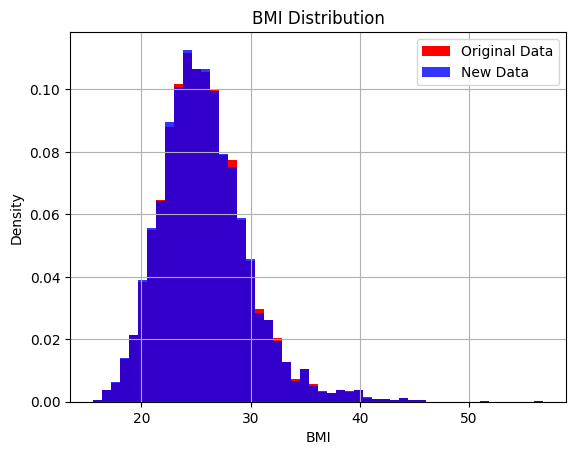

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

data['BMI'].hist(bins=50, ax=ax, density=True, color='red', label='Original Data')

new_data['BMI'].hist(bins=50, ax=ax, density=True, color='blue', alpha=0.8, label='New Data')

ax.legend()
ax.set_xlabel('BMI')
ax.set_ylabel('Density')
ax.set_title('BMI Distribution')

plt.savefig('distribution.png')

plt.show()

##2.Filling Missing Values:  Simple Imputer: Numerical Data

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [26]:
data2 = pd.read_csv("https://raw.githubusercontent.com/realaryagupta/Cardiovascular-Disease-Risk-Prediction/refs/heads/main/dataset/framingham.csv")

In [27]:
data2.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [28]:
columnss = [var for var in data2.columns if data2[var].isnull().mean() < 0.05 and data2[var].isnull().mean() > 0]
columnss

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

In [29]:
new = data2[columnss].sample(5)

In [30]:
data2[columnss].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   education   4135 non-null   float64
 1   cigsPerDay  4211 non-null   float64
 2   BPMeds      4187 non-null   float64
 3   totChol     4190 non-null   float64
 4   BMI         4221 non-null   float64
 5   heartRate   4239 non-null   float64
dtypes: float64(6)
memory usage: 198.9 KB


In [32]:
data2[columnss].isnull().mean()

,0
education,0.024764
cigsPerDay,0.006840
BPMeds,0.012500
totChol,0.011792
BMI,0.004481
heartRate,0.000236


In [33]:
x = data2[columnss].drop(columns=['BMI'])
y = data2[columnss]['BMI']

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [35]:
x_train.shape , x_test.shape

((3392, 5), (848, 5))

In [36]:
x_train.isnull().mean()

,0
education,0.025354
cigsPerDay,0.006781
BPMeds,0.012677
totChol,0.012677
heartRate,0.000000


In [37]:
mean_education = x_train['education'].mean()
median_education = x_train['education'].median()

mean_cigsPerDay = x_train['cigsPerDay'].mean()
median_cigsPerDay = x_train['cigsPerDay'].median()

In [38]:
x_train['education_mean']= x_train['education'].fillna(mean_education)
x_train['education_median'] = x_train['education'].fillna(median_education)

x_train['cigsPerDay_mean'] = x_train['cigsPerDay'].fillna(mean_cigsPerDay)
x_train['cigsPerDay_median'] = x_train['cigsPerDay'].fillna(median_cigsPerDay)

In [39]:
x_train.sample(5)

,education,cigsPerDay,BPMeds,totChol,heartRate,education_mean,education_median,cigsPerDay_mean,cigsPerDay_median
1170,1.0,0.0,0.0,256.0,65.0,1.0,1.0,0.0,0.0
1553,1.0,15.0,0.0,285.0,70.0,1.0,1.0,15.0,15.0
3227,2.0,15.0,0.0,300.0,75.0,2.0,2.0,15.0,15.0
2237,1.0,0.0,0.0,246.0,122.0,1.0,1.0,0.0,0.0
50,1.0,3.0,0.0,267.0,60.0,1.0,1.0,3.0,3.0


Checking for variance after filling values

In [40]:
print('original education variance: ',x_train['education'].var())
print('education variance after mean: ',x_train['education_mean'].var())
print('education variance after median: ',x_train['education_median'].var())

print('original CigsPerDay variance: ',x_train['cigsPerDay'].var())
print('CigsPerDay variance after mean: ',x_train['cigsPerDay'].var())
print('CigsPerDay variance after median: ',x_train['cigsPerDay'].var())

original education variance:  1.0413059096695905
education variance after mean:  1.0148970897841336
education variance after median:  1.0149007083122066
original CigsPerDay variance:  139.88760805698
CigsPerDay variance after mean:  139.88760805698
CigsPerDay variance after median:  139.88760805698


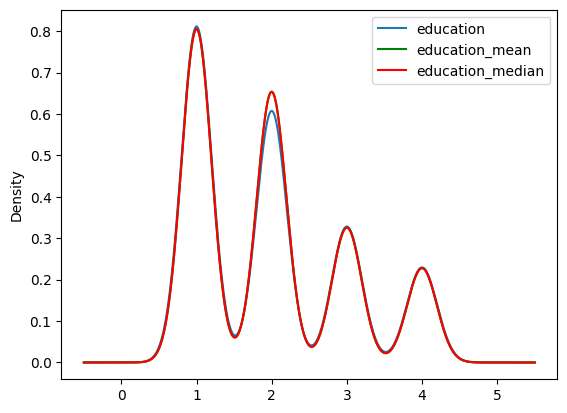

In [41]:
#Education

fig = plt.figure()
ax = fig.add_subplot(111)

#original
x_train['education'].plot(kind = 'kde', ax=ax)

#mean
x_train['education_mean'].plot(kind = 'kde', ax=ax, color = 'green' )

#median
x_train['education_median'].plot(kind = 'kde', ax=ax, color = 'red' )

#add legends
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc = 'best')

plt.savefig('variance.png')

plt.show()

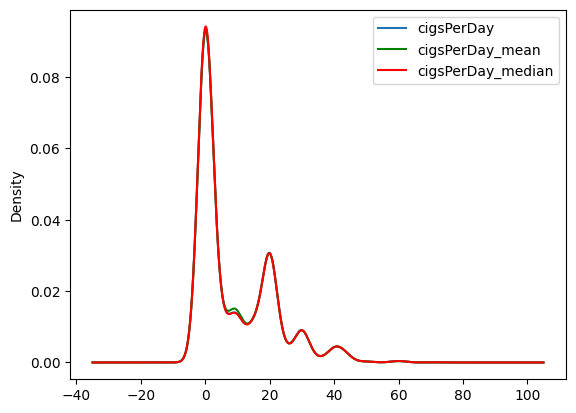

In [42]:
#Cigeretes per day

fig = plt.figure()
ax = fig.add_subplot(111)

#original
x_train['cigsPerDay'].plot(kind = 'kde', ax=ax)

#mean
x_train['cigsPerDay_mean'].plot(kind = 'kde', ax=ax, color = 'green' )

#median
x_train['cigsPerDay_median'].plot(kind = 'kde', ax=ax, color = 'red' )

#add legends
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc = 'best')

plt.savefig('variance2.png')

plt.show()

In [43]:
x_train.cov()          #for covariance

,education,cigsPerDay,BPMeds,totChol,heartRate,education_mean,education_median,cigsPerDay_mean,cigsPerDay_median
education,1.041306,0.149084,0.000950,-1.282205,-0.819853,1.041306,1.041306,0.148080,0.144686
cigsPerDay,0.149084,139.887608,-0.082887,-16.643974,10.999415,0.145310,0.144951,139.887608,139.887608
BPMeds,0.000950,-0.082887,0.028977,0.564144,0.032353,0.000926,0.000927,-0.082318,-0.080501
totChol,-1.282205,-16.643974,0.564144,1928.469020,49.237339,-1.249711,-1.249353,-16.528433,-16.921240
heartRate,-0.819853,10.999415,0.032353,49.237339,146.287663,-0.799060,-0.799656,10.924810,10.708862
education_mean,1.041306,0.145310,0.000926,-1.249711,-0.799060,1.014897,1.014897,0.144325,0.141017
education_median,1.041306,0.144951,0.000927,-1.249353,-0.799656,1.014897,1.014901,0.143968,0.140647
cigsPerDay_mean,0.148080,139.887608,-0.082318,-16.528433,10.924810,0.144325,0.143968,138.938798,138.938798
cigsPerDay_median,0.144686,139.887608,-0.080501,-16.921240,10.708862,0.141017,0.140647,138.938798,139.467435


In [44]:
x_train.corr()       #for correlation

,education,cigsPerDay,BPMeds,totChol,heartRate,education_mean,education_median,cigsPerDay_mean,cigsPerDay_median
education,1.000000,0.012349,0.005483,-0.028934,-0.066289,1.000000,1.000000,0.012310,0.012005
cigsPerDay,0.012349,1.000000,-0.041079,-0.032089,0.076900,0.012191,0.012161,1.000000,1.000000
BPMeds,0.005483,-0.041079,1.000000,0.076124,0.015678,0.005400,0.005409,-0.041075,-0.040091
totChol,-0.028934,-0.032089,0.076124,1.000000,0.092575,-0.028204,-0.028195,-0.031958,-0.032655
heartRate,-0.066289,0.076900,0.015678,0.092575,1.000000,-0.065579,-0.065628,0.076630,0.074973
education_mean,1.000000,0.012191,0.005400,-0.028204,-0.065579,1.000000,0.999998,0.012154,0.011853
education_median,1.000000,0.012161,0.005409,-0.028195,-0.065628,0.999998,1.000000,0.012124,0.011822
cigsPerDay_mean,0.012310,1.000000,-0.041075,-0.031958,0.076630,0.012154,0.012124,1.000000,0.998103
cigsPerDay_median,0.012005,1.000000,-0.040091,-0.032655,0.074973,0.011853,0.011822,0.998103,1.000000
